# **Proyecto 3 – Agrupación de datos sobre obesidad** 🍲

## Integrantes:
📌Marjoris Parejo

📌Leidys Valencia

📌Adriana Maldonado

📌Julio Cesar Rodríguez

## Explicación del problema🍔🍟
La obesidad es un problema de salud pública que afecta a muchas personas en todo el mundo. En este proyecto, se pretende explorar la base de datos sobre obesidad utilizando técnicas de reducción de dimensionalidad y agrupación (clustering) para analizar los patrones de los hábitos alimenticios y otras variables que afectan a la obesidad.

La base de datos con la que trabajaremos como un dataframe, incluye datos para estimar los niveles de obesidad en México, Perú y Colombia, teniendo en cuenta los hábitos alimenticios🌯🥐🍫 y la condición física🏃‍♀️‍➡️🧎‍♂️🚴🛌

Tenemos el siguiente diccionario de datos que nos proporciona información sobre la descripción de cada una de las variables del dataset `ObesityDataSet_raw_and_data_sinthetic.csv` y su tipo. 📚

<div align="center">


| Nombre de la Variable           | Tipo         | Descripción                                                                              |
|---------------------------------|--------------|------------------------------------------------------------------------------------------|
| Gender                          | Categórica   | Género                                                                                   |
| Age                             | Continua     | Edad                                                                                    |
| Height                          | Continua     | Altura                                                                                   |
| Weight                          | Continua     | Peso                                                                                    |
| family_history_with_overweight  | Binaria      | ¿Algún familiar ha sufrido o sufre de sobrepeso?                                        |
| FAVC                            | Binaria      | ¿Consumes alimentos altos en calorías frecuentemente?                                   |
| FCVC                            | Entera       | ¿Sueles comer vegetales en tus comidas?                                                 |
| NCP                             | Continua     | ¿Cuántas comidas principales tienes al día?                                             |
| CAEC                            | Categórica   | ¿Consumes alimentos entre comidas?                                                      |
| SMOKE                           | Binaria      | ¿Fumas?                                                                                 |
| CH2O                            | Continua     | ¿Cuánta agua bebes al día?                                                              |
| SCC                             | Binaria      | ¿Monitoreas las calorías que consumes diariamente?                                      |
| FAF                             | Continua     | ¿Con qué frecuencia realizas actividad física?                                          |
| TUE                             | Entera       | ¿Cuánto tiempo usas dispositivos tecnológicos como teléfono, videojuegos, televisión, computadora y otros? |
| CALC                            | Categórica   | ¿Con qué frecuencia consumes alcohol?                                                   |
| MTRANS                          | Categórica   | ¿Qué medio de transporte usas habitualmente?                                            |
| NObeyesdad                      | Categórica   | Nivel de obesidad                                                                       |


</div>

Para desarrollar el proyecto instalaremos e importaremos las librerías necesarias.📖

In [68]:
# Importar las librerías necesarias

import subprocess
import sys

# Función para instalar un paquete
def instalar_paquete(paquete):
    subprocess.check_call([sys.executable, "-m", "pip", "install", paquete])

# Lista de librerías necesarias
paquetes = [
    "pandas", "numpy", "matplotlib", "seaborn", "plotly", 
    "statsmodels", "scikit-learn", "ucimlrepo", "ipython", "tabulate"
]

# Instalar las librerías si no están presentes
for paquete in paquetes:
    try:
        __import__(paquete)
    except ImportError:
        print(f"Instalando {paquete}...")
        instalar_paquete(paquete)

# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import statsmodels.api as sm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from ucimlrepo import fetch_ucirepo
from IPython.display import display, HTML
from statsmodels.formula.api import ols
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from tabulate import tabulate

print("Todas las librerías se han instalado e importado correctamente.")


Instalando scikit-learn...
Instalando ipython...
Todas las librerías se han instalado e importado correctamente.


Importamos la base de datos como dataframe 📊💻

In [69]:
obesity=pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

Observamos la información del dataframe que creamos para conocer las variables que lo componen.

In [70]:
obesity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

Identificamos los registros 📊 y las variables 🗂️ del DataFrame.

In [71]:
obesity.shape

(2111, 17)

In [72]:
variables_numericas= obesity.select_dtypes(include=['int64', 'float64']).columns.tolist()
variables_cualitativas= obesity.select_dtypes(include=['object']).columns.tolist()
print(f'Variables numéricas📈: {variables_numericas}\n')
print(f'Variables cualitativas📊: {variables_cualitativas}\n')


Variables numéricas📈: ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

Variables cualitativas📊: ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']



Nuestro dataframe incluye 2111 observaciones y 17 variables (8 númericas y 9 cualitativas, que se observan en las tablas.🔢🔠



### **Variables Numéricas**


<div align="center">

| Nombre de la Variable | Tipo     |
|-----------------------|----------|
| Age                   | Continua |
| Height                | Continua |
| Weight                | Continua |
| FCVC                  | Continua |
| NCP                   | Continua |
| CH2O                  | Continua |
| FAF                   | Continua |
| TUE                   | Continua |

</div>

### **Variables Cualitativas**

<div align="center">

| Nombre de la Variable           | Tipo         |
|---------------------------------|--------------|
| Gender                          | Categórica   |
| family_history_with_overweight  | Binaria      |
| FAVC                            | Binaria      |
| CAEC                            | Categórica   |
| SMOKE                           | Binaria      |
| SCC                             | Binaria      |
| CALC                            | Categórica   |
| MTRANS                          | Categórica   |
| NObeyesdad                      | Categórica   |

</div>


Para conocer la estructura del dataframe visualizamos las primeras 10 observaciones. 🔎



In [73]:
obesity.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


Para cada una de las variables de nuestro DataFrame 📊, vamos a explorar las categorías 🗂️ y el número de observaciones 👀 que tiene cada una de ellas.

In [74]:
# Lista de columnas que se van a contar
columns_to_count = [
    'Gender',
    'family_history_with_overweight',
    'FAVC',
    'CAEC',
    'SMOKE',
    'SCC',
    'CALC',
    'MTRANS',
    'NObeyesdad'
]

# Función para crear Dataframe
def create_styled_table(column):
    counts = obesity[column].value_counts()
    df = pd.DataFrame(counts).reset_index()
    df.columns = ['Category', 'Count']
    df['Category'] = df['Category'].astype(str)  #Categorías tipo str

    # Generar HTML
    html = df.to_html(index=False, escape=False)
    return f"<h4>{column}</h4>" + html

# Imprimir los conteos de cada columna en tablas separadas
for column in columns_to_count:
    table_html = create_styled_table(column)
    display(HTML(table_html))

Category,Count
Male,1068
Female,1043


Category,Count
yes,1726
no,385


Category,Count
yes,1866
no,245


Category,Count
Sometimes,1765
Frequently,242
Always,53
no,51


Category,Count
no,2067
yes,44


Category,Count
no,2015
yes,96


Category,Count
Sometimes,1401
no,639
Frequently,70
Always,1


Category,Count
Public_Transportation,1580
Automobile,457
Walking,56
Motorbike,11
Bike,7


Category,Count
Obesity_Type_I,351
Obesity_Type_III,324
Obesity_Type_II,297
Overweight_Level_I,290
Overweight_Level_II,290
Normal_Weight,287
Insufficient_Weight,272


## Resumen del Análisis inicial de la base de datos

### Estructura de la base de datos
- La base de datos contiene un total de **2111 registros** y **17 variables**.
- Este tamaño de datos es adecuado para realizar análisis exploratorios y métodos de agrupamiento sin grandes problemas de rendimiento.

### Tipos de variables
- **Variables numéricas (8)**: Estas variables incluyen datos cuantitativos, como `Age`, `Height`, `Weight`, `FCVC`, `NCP`, `CH2O`, `FAF` y `TUE`. Estas variables son cruciales para el análisis estadístico, especialmente en métodos de agrupamiento o clustering.
- **Variables cualitativas (9)**: Estas variables representan datos categóricos, como `Gender`, `family_history_with_overweight`, `FAVC`, `CAEC`, `SMOKE`, `SCC`, `CALC`, `MTRANS`, y `NObeyesdad`. Este tipo de variables es útil para clasificar o segmentar los datos y entender patrones en subgrupos específicos.

### Potencial para el análisis
- Las variables numéricas permiten realizar análisis cuantitativos y métodos de agrupamiento, mientras que las variables cualitativas permiten realizar análisis de clasificación y segmentación.
- Las variables numéricas, especialmente `Weight` y `Height`, junto con otros factores como `Age` y `FAF` (frecuencia de actividad física), probablemente tengan una relación significativa con la variable objetivo `NObeyesdad`, que parece estar relacionada con el nivel de obesidad.


### Conclusión
Este análisis inicial muestra que la base de datos está bien estructurada y es adecuada para un análisis de clustering y exploración. La mezcla de variables numéricas y cualitativas nos permite realizar tanto agrupamientos cuantitativos como análisis de patrones cualitativos. Esto será útil para formular hipótesis y entender cómo diferentes factores afectan el nivel de obesidad en esta población.


Continuamos con una exploración mas detallada de los datos, por lo que para realizar el análisis de agrupamiento se convertirán las variables cualitativas en numéricas.

In [75]:
# Codificación de las variables cualitativas

# Gender: Categórica (masculino: 0, femenino: 1)
obesity['Gender'] = obesity['Gender'].map({'Male': 0, 'Female': 1})

# family_history_with_overweight: Binaria (no: 0, sí: 1)
obesity['family_history_with_overweight'] = obesity['family_history_with_overweight'].map({'no': 0, 'yes': 1})

# FAVC: Binaria (no: 0, sí: 1)
obesity['FAVC'] = obesity['FAVC'].map({'no': 0, 'yes': 1})

#CAEC Categórica
obesity['CAEC'] = obesity['CAEC'].map({'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3})

# SMOKE: Binaria (no: 0, sí: 1)
obesity['SMOKE'] = obesity['SMOKE'].map({'no': 0, 'yes': 1})

# SCC: Binaria (no: 0, sí: 1)
obesity['SCC'] = obesity['SCC'].map({'no': 0, 'yes': 1})

#CALC Categórica
obesity['CALC'] = obesity['CALC'].map({'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3})

# MTRANS: Categórica (aplicando codificación one-hot)
obesity = pd.get_dummies(obesity, columns=['MTRANS'], drop_first=True)

# NObeyesdad: Categórica (por nivel de obesidad)
obesity['NObeyesdad'] = obesity['NObeyesdad'].map({
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Obesity_Type_II': 5,
    'Obesity_Type_III': 6
})

# Mostrar el DataFrame con las conversiones
obesity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   int64  
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   int64  
 5   FAVC                            2111 non-null   int64  
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   int64  
 9   SMOKE                           2111 non-null   int64  
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   int64  
 12  FAF                             21

In [76]:
#Ver la estructura de las primeras filas del dataframe
obesity.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,NObeyesdad,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,1,21.0,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,1,False,False,True,False
1,1,21.0,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,1,False,False,True,False
2,0,23.0,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,1,False,False,True,False
3,0,27.0,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,2,False,False,False,True
4,0,22.0,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,3,False,False,True,False
5,0,29.0,1.62,53.0,0,1,2.0,3.0,1,0,2.0,0,0.0,0.0,1,1,False,False,False,False
6,1,23.0,1.50,55.0,1,1,3.0,3.0,1,0,2.0,0,1.0,0.0,1,1,False,True,False,False
7,0,22.0,1.64,53.0,0,0,2.0,3.0,1,0,2.0,0,3.0,0.0,1,1,False,False,True,False
8,0,24.0,1.78,64.0,1,1,3.0,3.0,1,0,2.0,0,1.0,1.0,2,1,False,False,True,False
9,0,22.0,1.72,68.0,1,1,2.0,3.0,1,0,2.0,0,1.0,1.0,0,1,False,False,True,False


Teniendo en cuenta la documentación disponible en https://www.sciencedirect.com/science/article/pii/S2352340919306985?via%3Dihub la variable NObeyesdad se contruye teniendo en cuenta el índice de masa corporar (IMC) que se calcula mediante la ecuación $$ \text{IMC} = \frac{\text{Weight}}{\text{Height}^2} $$
Porteriormente se hace una etiqueta teniendo en cuenta el valor de IMC así:

• **Underweight** si IMC es menor que 18.5

• **Normal** si IMC está entre 18.5 to 24.9

• **Overweight** si IMC está entre 25.0 to 29.9

• **Obesity I** si IMC está entre 30.0 to 34.9

• **Obesity II** si IMC está entre 35.0 to 39.9

• **Obesity III** si IMC es mayor a 40

Por esta razón en el análisis no se va a trabajar con las variables Weight y Height


In [77]:
# Excluir las variables 'Height' y 'Weight' de la matriz de correlación
correlation_matrix = obesity.drop(columns=['Height', 'Weight']).corr()
rounded_correlation_matrix = correlation_matrix.round(2)

#Visualizar la matriz de correlación
fig = px.imshow(
    rounded_correlation_matrix,
    labels=dict(x="Variables", y="Variables", color="Correlación"),
    x=rounded_correlation_matrix.columns,
    y=rounded_correlation_matrix.index,
    color_continuous_scale=px.colors.sequential.Viridis,
    title="Matriz de Correlación - Variables Numéricas",
    template='seaborn',
    width=1250,
    height=1250,
    text_auto=True
)

# Mostrar el gráfico
fig.show()

## Hipótesis planteadas a partir del análisis inicial

- 🍕Existe una correlación positiva moderada entre la historia familiar de sobrepeso `family_history_with_overweight` y el nivel de obesidad `NObeyesdad` en la población estudiada. Es decir, sugiere que los individuos con antecedentes familiares de sobrepeso tienden a tener un mayor nivel de obesidad.


  > La correlación de 0.51 indica que hay una relación significativa, aunque no extremadamente fuerte, entre tener un historial familiar de sobrepeso y el nivel de obesidad de un individuo. Este hallazgo sugiere que los factores genéticos y ambientales compartidos en las familias pueden influir en el peso de las personas. Es probable que aquellos con antecedentes familiares de sobrepeso tengan un mayor riesgo de desarrollar obesidad, posiblemente debido a la combinación de factores genéticos, hábitos alimenticios y estilos de vida similares que se transmiten entre los miembros de la familia.

- Existe una correlación negativa leve entre el hábito de consumir alimentos entre comidas `CAEC` y el nivel de obesidad `NObeyesdad` en la población estudiada. Esto sugiere que los individuos que menos alimentos consumen entre comidas tienden a tener mayor nivel de obesidad.
> La correlación de -0.33 indica que hay una relación moderada negativa. Este hallazgo sugiere que los hábitos de alimentación pueden llegar a tener una influencia sobre el riesgo de desarrollar obesidad, sin embargo, las bajas correlaciones de las otras variables asociadas a los hábitos alimenticios con el nivel de obesidad invitan a que se estudie esta hipótesis con mayor profundidad.

- 🍞Existe una correlación negativa moderada (-0.55) entre el uso del transporte público `MTRANS_Public_Transportation` y la edad `Age`. A medida que aumenta la edad, es menos probable que las personas utilicen el transporte público.


  > **Implicaciones**
Este hallazgo es relevante para entender cómo los patrones de transporte afectan la actividad física. Si los adultos mayores utilizan menos el transporte público, podrían tener niveles de actividad física más bajos, lo que podría aumentar el riesgo de obesidad.

- Existe una correlación negativa leve (-0.3) entre el tiempo de uso de dispositivos tecnológicos como teléfono, videojuegos, televisión, computadora y otros `TUE`  con la edad `Age`.



El uso del método
`describe()` en el DataFrame obesity proporciona un resumen estadístico que ayuda a identificar variables numéricas 📈, así como sus características clave, como media y frecuencias. Esta información es esencial para entender la distribución de los datos y facilitar la formulación de hipótesis 🧠, así como el desarrollo de técnicas de agrupamiento y reducción de dimensionalidad en el análisis de la obesidad 📊.


In [78]:
# Obtener estadísticas descriptivas de las variables numéricas
obesity.drop(columns=['Height', 'Weight']).corr().describe()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,NObeyesdad,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,0.049082,0.018456,0.081939,0.045580,0.099853,0.076846,0.040871,0.069098,0.079729,0.046563,0.045324,0.045119,0.074972,0.091752,0.043503,0.041969,0.016403,0.030506
std,0.260766,0.304754,0.280577,0.266046,0.240593,0.236151,0.267035,0.235570,0.243442,0.257178,0.260821,0.256644,0.238996,0.303564,0.242054,0.243343,0.294920,0.260469
min,-0.189607,-0.554448,-0.185422,-0.190658,-0.101135,-0.067600,-0.329350,-0.050660,-0.144995,-0.194508,-0.199901,-0.296931,-0.086799,-0.329350,-0.099496,-0.124844,-0.554448,-0.284754
25%,-0.062951,-0.078570,-0.058364,-0.077737,0.014073,-0.004281,-0.074689,-0.005451,0.001299,-0.014450,-0.079267,-0.039829,-0.024061,-0.090305,-0.027814,-0.036786,-0.058408,-0.057128
50%,-0.042008,-0.020146,0.000975,-0.017142,0.041294,0.025001,0.039339,0.015752,0.019052,0.019107,0.015578,0.014789,0.015858,0.029077,-0.008969,-0.009730,0.004121,-0.001510
75%,0.076523,0.059048,0.128420,0.067288,0.066541,0.067799,0.081074,0.044673,0.085655,0.066104,0.072448,0.056063,0.079790,0.208757,0.021948,0.016183,0.052850,0.040941
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


El anterior resumen descriptivo nos ayuda a determinar si debemos escalar nuestros datos. Para ello, se presenta el siguiente análisis:

1. **Diferencias en Escalas de las Variables**
- La variable `Age` tiene rangos amplios en comparación con otras variables como
`FCVC`, `NCP`, `CH2O`, `FAF`, `TUE` que tienen un rango limitado, generalmente entre 0 y 4.
- Esta diferencia en escalas indica que, al realizar un análisis de clustering, las variables con valores mayores podrían tener un mayor impacto en la distancia que aquellas con valores pequeños (como FCVC).

2. **Tipo de Variables**

- Las variables relacionadas con los hábitos alimenticios tienen una distribución similar.
- Las variables relacionadas con el estilo de vida (FAF, TUE y CALC) Tienen una distribución similar.

Escalar las variables continuas reducirá el efecto de estas diferencias y permitirá que todas las variables contribuyan de manera equilibrada en el análisis de clustering.

3. **Distribución de las Variables**

- Si las variables tienen distribuciones muy diferentes, además de escalar, a veces es útil realizar una transformación (por ejemplo, logarítmica) para que las variables sean más comparables. Sin embargo, en este caso, parece que estandarizar es suficiente.
Se concluye que se escalarán los datos.

## Distribución de los datos asociados a los hábitos de alimentación

In [79]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# Lista de variables asociadas a hábitos de alimentación
variables = ['FCVC', 'NCP', 'CH2O']

# Crear una figura con subplots
fig = make_subplots(rows=1, cols=len(variables), subplot_titles=variables)

# Agregar un boxplot para cada variable en un subplot diferente
for i, var in enumerate(variables):
    fig.add_trace(
        go.Box(y=obesity[var], name=var, boxmean=True),  # `boxmean=True` muestra la media
        row=1, col=i+1
    )

# Configuración de la gráfica
fig.update_layout(
    title="Boxplot de Variables asociadas a hábitos de alimentación no binarias",
    height=500,
    width=1500,
    showlegend=False,
    template="seaborn"
)

# Mostrar la gráfica
fig.show()

In [80]:
# Lista de variables asociadas a hábitos de comportamiento
variables = ['FAF', 'TUE', 'CALC']

# Crear una figura con subplots
fig = make_subplots(rows=1, cols=len(variables), subplot_titles=variables)

# Agregar un boxplot para cada variable en un subplot diferente
for i, var in enumerate(variables):
    fig.add_trace(
        go.Box(y=obesity[var], name=var, boxmean=True),  # `boxmean=True` muestra la media
        row=1, col=i+1
    )

# Configuración de la gráfica
fig.update_layout(
    title="Boxplot de Variables asociadas al estilo de vida",
    height=500,
    width=1500,
    showlegend=False,
    template="seaborn"
)

# Mostrar la gráfica
fig.show()

In [81]:
# Excluir las variables Height, Weight y NObeyesdad de la base de datos
obesity_filtered = obesity.drop(columns=['Height', 'Weight', 'NObeyesdad'])

# Escalar los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(obesity_filtered)

# Reducción de dimensionalidad usando Análisis de Componentes Principales (ACP)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Visualización de los datos reducidos a dos dimensiones con Plotly
import plotly.graph_objects as go

# Crear la figura
fig = go.Figure()

# Añadir los puntos de PCA al gráfico
fig.add_trace(go.Scatter(
    x=pca_data[:, 0],
    y=pca_data[:, 1],
    mode='markers',
    marker=dict(
        size=20,
        color='lime',
        line=dict(width=1, color='green'),
    ),
    name='Datos PCA'
))

# Configuración del layout
fig.update_layout(
    title='Reducción de dimensionalidad con ACP',
    xaxis_title='Componente Principal 1',
    yaxis_title='Componente Principal 2',
    template='seaborn',
    width=1000,
    height=800
)

# Mostrar el gráfico
fig.show()

Utilizaremos tres métodos diferentes para determinar el número óptimo de clúster. A saber: Método del codo, Índice de silueta el coeficiente de Calinski-Harabasz.

**El método del codo**

 El método del codo (Elbow Method) 💪 es una técnica para determinar el número óptimo de clústeres en el análisis de agrupamiento como K-Means. Se basa en la observación de la suma de las distancias cuadradas dentro de los clusters (SSE, del inglés Sum of Squared Errors). A medida que aumentamos el número de clusters, el SSE disminuye porque los puntos de datos se agrupan más cerca de sus centroides.

 En este método el punto donde se encuentra el "codo" es el número óptimo de clusters. Este es el punto donde la disminución de la SSE se vuelve menos pronunciada, indicando que agregar más clusters no mejora significativamente la cohesión de los grupos.

 **El método del Índice de silueta**

Este índice mide qué tan similares son los puntos dentro de un cluster en comparación con los puntos de otros clusters. Un valor cercano a 1 indica que los clusters están bien separados, mientras que un valor cercano a 0 indica que los clusters se superponen.

**Coeficiente de Calinski-Harabasz**

Este índice evalúa la dispersión de los clusters y la separación entre ellos. Un valor más alto indica clusters bien definidos.

El análisis de clústeres nos permitirá identificar grupos de individuos que comparten características similares en relación con su peso, hábitos alimenticios, actividad física y otros factores. Estos grupos pueden proporcionar información valiosa para la comprensión de los patrones de obesidad en la población estudiada.

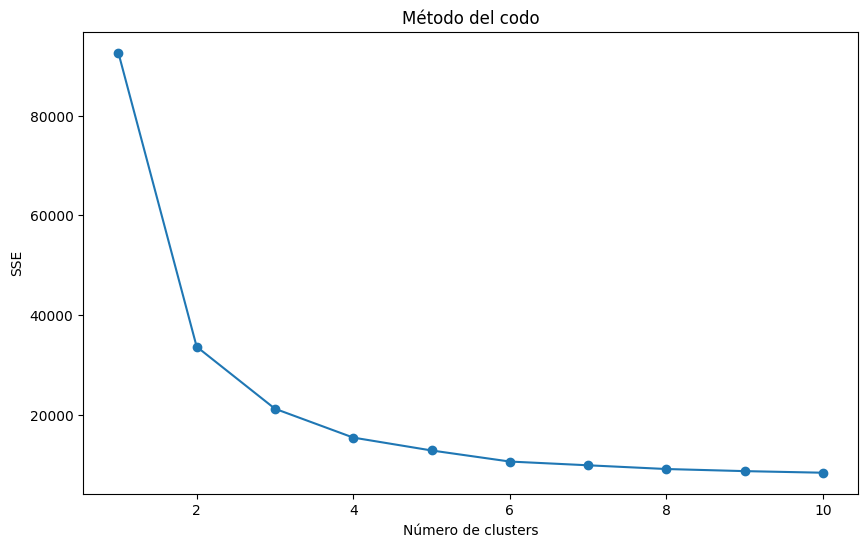

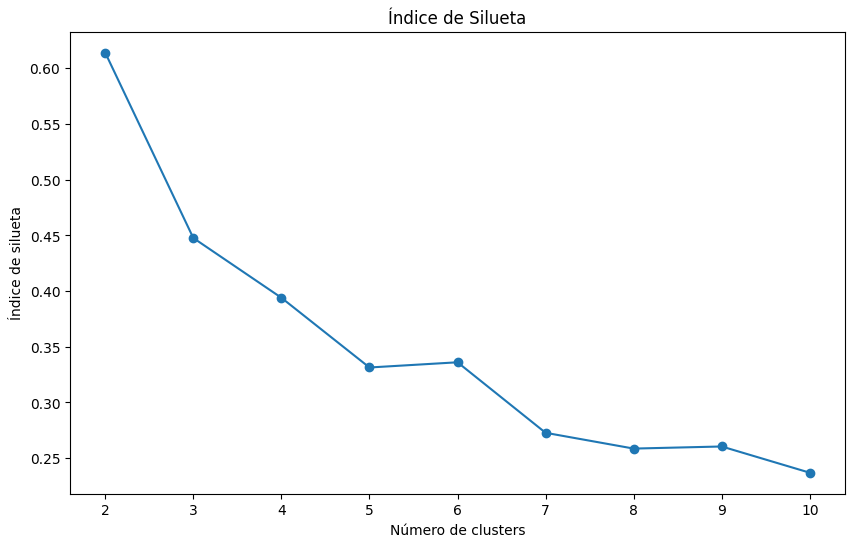

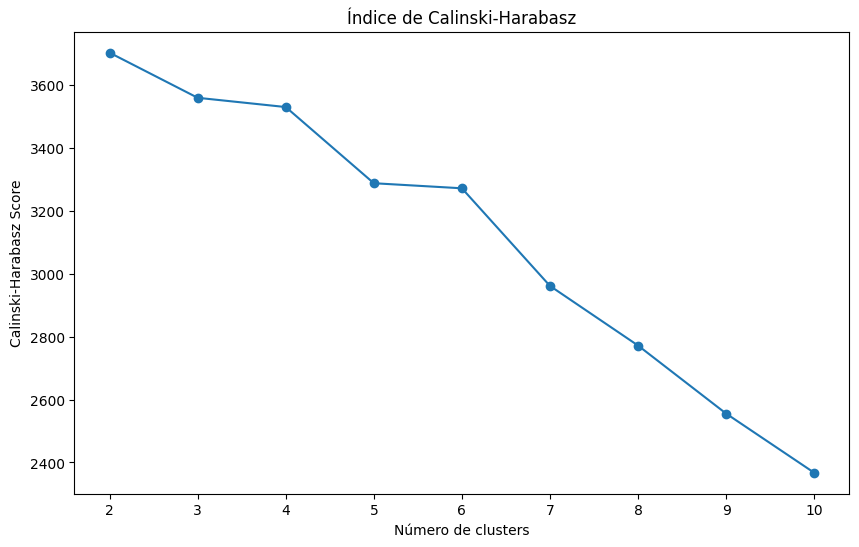

In [82]:
# Importar la función calinski_harabasz_score
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Método del codo para K-Means
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(obesity_filtered)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Método del codo')
plt.xlabel('Número de clusters')
plt.ylabel('SSE')
plt.show()

# Índice de Silueta
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(obesity_filtered)
    score = silhouette_score(obesity_filtered, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Índice de Silueta')
plt.xlabel('Número de clusters')
plt.ylabel('Índice de silueta')
plt.show()

# Índice de Calinski-Harabasz
calinski_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(obesity_filtered)
    score = calinski_harabasz_score(obesity_filtered, labels)
    calinski_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), calinski_scores, marker='o')
plt.title('Índice de Calinski-Harabasz')
plt.xlabel('Número de clusters')
plt.ylabel('Calinski-Harabasz Score')
plt.show()

**Conclusión:**

Se puede observar que por los tres métodos el número óptimo de clusters es $$n=2$$
Ya que en el método del codo se encuentra en $n=2$, el El grpafico del índice de silueta, se puede observar que el punto más cercano a 1 es cuando $n=2$ y en cuanto al índice de Calinski-Harabasz el valor más alto también se encuentra en $n=2$.

In [83]:
# Selección del número de clústeres según el método del codo
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=seed)
kmeans_labels = kmeans.fit_predict(pca_data)

# Crear la figura con Plotly

# Convertir los datos a un DataFrame para facilitar la visualización

pca_df = pd.DataFrame(data=pca_data, columns=['Componente Principal 1', 'Componente Principal 2'])
pca_df['Cluster'] = kmeans_labels
obesity['Cluster'] = kmeans_labels

# Definir colores y nombres personalizados para cada clúster
colores = [ '#3283FE', '#F6F926']
nombres_clusters = {0: "Clúster 2 ", 1: "Clúster 1"}

# Mapear los nombres a los clústeres
pca_df['Nombre del Cluster'] = pca_df['Cluster'].map(nombres_clusters)

# Crear el gráfico de dispersión
fig = px.scatter(
    pca_df,
    x='Componente Principal 1',
    y='Componente Principal 2',
    title='Agrupación de datos con K-means',
    color_discrete_sequence=colores,
    color='Nombre del Cluster',
    labels={'Cluster': 'Cluster'},
    opacity=0.7,
)

# Aumentar el tamaño de los puntos y agregar bordes
fig.update_traces(marker=dict(size=20, line=dict(width=2, color='black')))  # Bordes en negro


# Añadir etiquetas de ejes
fig.update_layout(
    xaxis_title='Componente Principal 1',
    yaxis_title='Componente Principal 2',
    template='seaborn',
    width=1000,
    height=800
)

# Mostrar el gráfico
fig.show()


Verificación gráfica de la relación entre los niveles de obesidad y la Componente principal 1

En el diagrama de cajas y bigotes podemos visualizar mejor la distribución del peso por clúster.

In [84]:
# Primero, combinamos pca_df con obesity en base al índice
obesity = obesity.join(pca_df[['Componente Principal 1', 'Componente Principal 2']])

# Crear el gráfico de bigotes

fig = px.box(
    obesity,
    x='NObeyesdad',
    y='Componente Principal 1',
    title='Distribución de la Componente Principal 1 por Nivel de Obesidad',
    labels={'NObeyesdad': 'Nivel de Obesidad', 'Componente Principal 1': 'Componente Principal 1'},
    color='NObeyesdad',  # Para colorear por los niveles de obesidad
    color_discrete_sequence=px.colors.qualitative.Set3  # Puedes elegir otro esquema de colores
)

# Mejorar la apariencia
fig.update_layout(
    xaxis_title='Nivel de Obesidad',
    yaxis_title='Componente Principal 1',
    template='seaborn',
    width=1000,
    height=800
)

# Mostrar el gráfico
fig.show()

La gráfica muestra un comportamiento creciente de la distribución de la componente principal 1 a medida que el nivel de obesidad aumenta, lo cual confirma que existe una relación entre la componente principal y el nivel de obesidad.

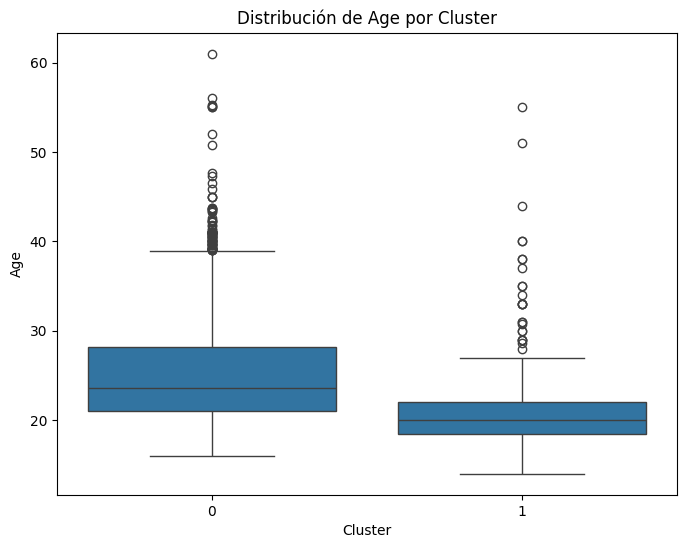

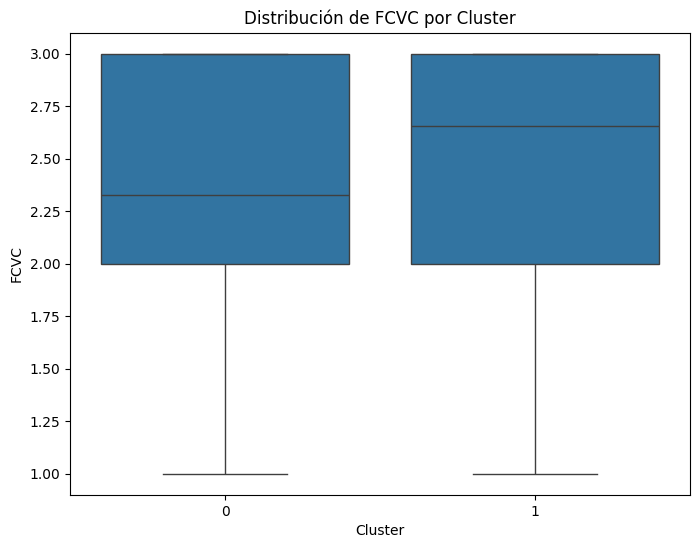

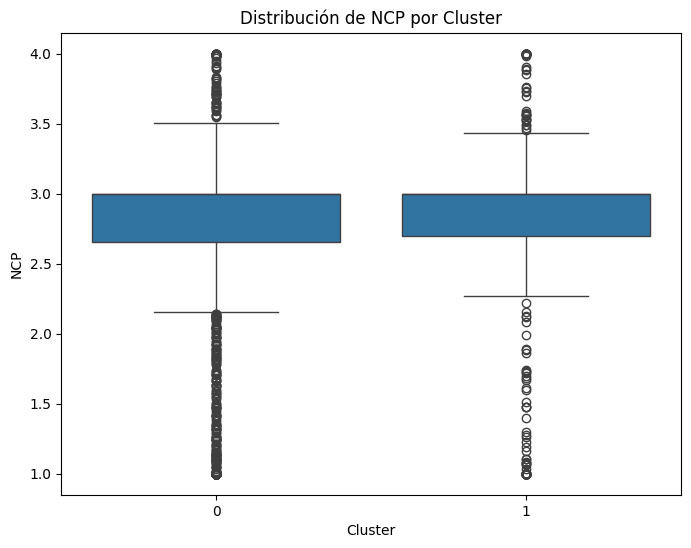

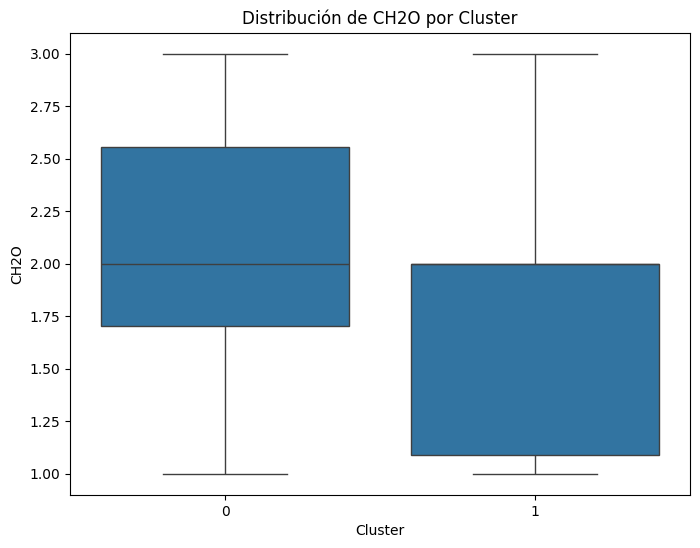

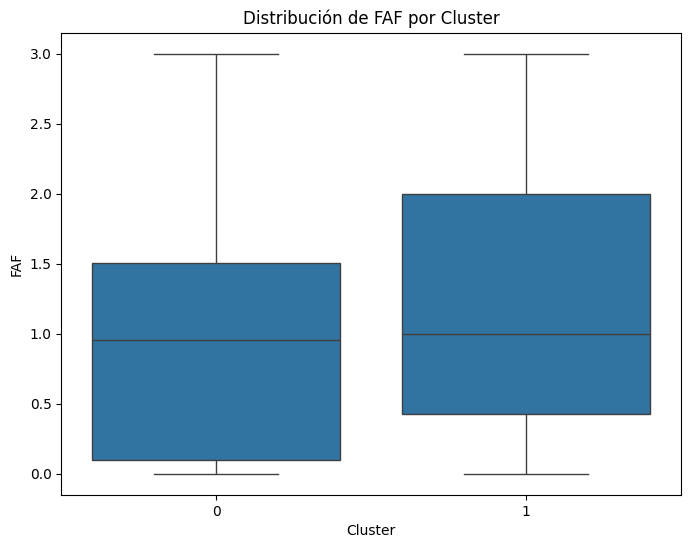

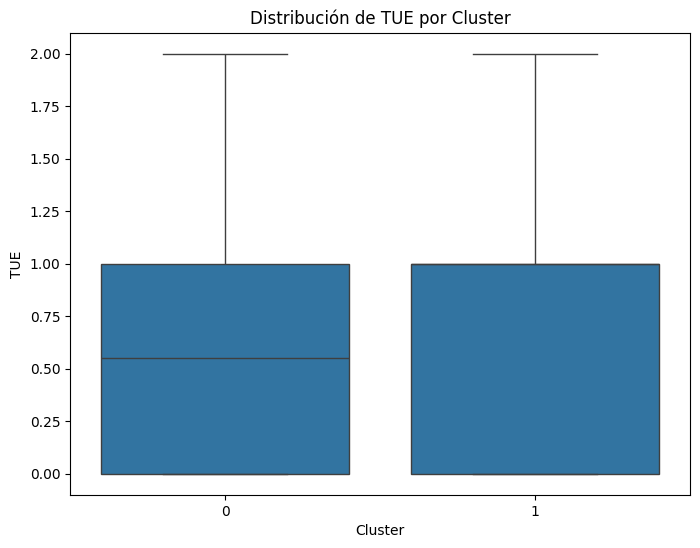

In [85]:
#Agregar las etiquetas de los clusters al data frame original
obesity['Cluster']=pca_df['Cluster']

#Visualizar la distribución de cada variable dentro de cada cluster
for column in ['Age','FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']:
  plt.figure(figsize=(8,6))
  sns.boxplot(x='Cluster', y=column, data=obesity)
  plt.title(f'Distribución de {column} por Cluster')
  plt.show()

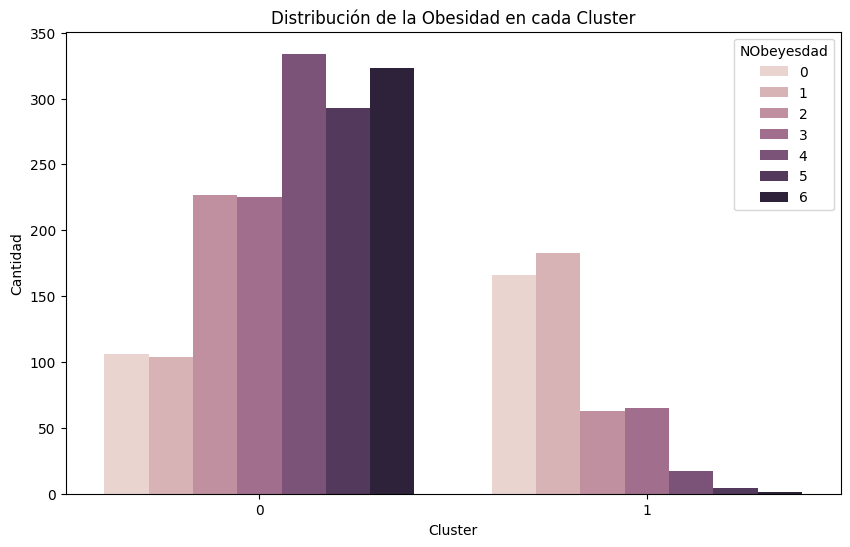

In [86]:
plt.figure(figsize=(10,6))
sns.countplot(data=obesity,x='Cluster',hue='NObeyesdad')
plt.title("Distribución de la Obesidad en cada Cluster")
plt.xlabel("Cluster")
plt.ylabel("Cantidad")
plt.legend(title='NObeyesdad')
plt.show()

## Análisis de los cluster

1. **Ejes y variables**:
   - En el eje **x** se muestran los **clusters** (0 y 1), que representan grupos de individuos con características similares formados por un método de agrupamiento (clustering).
   - En el eje **y** se muestra la **cantidad** de individuos en cada cluster, distribuidos por niveles de obesidad.
   - La variable **NObeyesdad** se representa en diferentes tonos de color, donde los valores más claros indican niveles de obesidad bajos (0) y los tonos más oscuros indican niveles más altos (hasta el 6).

2. **Distribución en clusters**:
   - En el **Cluster 0**, hay una mayor cantidad de individuos con niveles de obesidad altos (niveles 3, 4, 5 y 6), lo que indica que este cluster agrupa a personas con un riesgo más alto o un nivel avanzado de obesidad.
   - En el **Cluster 1**, predominan los niveles de obesidad más bajos (niveles 0, 1 y 2), sugiriendo que este cluster contiene personas con menor riesgo de obesidad o en etapas iniciales de sobrepeso.

### Conclusiones

1. **Segmentación efectiva por Nivel de obesidad**:
   - El método de clustering utilizado ha logrado una segmentación clara en dos grupos con diferentes características en cuanto a niveles de obesidad.
   - El **Cluster 0** agrupa principalmente a personas con niveles de obesidad altos, mientras que el **Cluster 1** agrupa a personas con niveles de obesidad bajos o normales.


Este análisis indica que el clustering aplicado ha sido exitoso en distinguir entre individuos con diferentes niveles de obesidad.

## Anális de los modelos

## Mejor modelo

El modelo con 2 clusters muestra un mejor Índice de Silueta (0.571), lo cual indica que los puntos dentro de cada cluster están mejor agrupados y que los clusters están bien separados. Aunque el modelo con 3 clusters tiene un Índice de Calinski-Harabasz más alto, este valor debe interpretarse junto con el Índice de Silueta. Dado que el Índice de Silueta es ligeramente mejor con 2 clusters, este modelo parece ser más adecuado para este conjunto de datos.

## Posibilidad de reentrenar el modelo

Podriamos experimentar con otros algoritmos de clustering o realizar una normalización adicional en las variables para ver si el rendimiento mejora aún más. Sin embargo, el modelo de 2 clusters ya proporciona una segmentación clara entre grupos con diferentes niveles de obesidad, lo cual es útil y alineado con los objetivos del análisis

En conclusión, el modelo con 2 clusters fue el mejor en términos de coherencia interna y separación entre clusters, lo cual es respaldado por un mayor Índice de Silueta. Este modelo permite identificar grupos bien definidos en términos de riesgo de obesidad y facilita el desarrollo de intervenciones específicas para cada grupo.

## Análisis final

## Análisis y métodos aplicados

1. **Métodos de preprocesamiento**: Se realizó una clasificación inicial de las variables en numéricas y cualitativas, lo cual ayuda a determinar qué variables serían útiles para el análisis de agrupamiento y visualización.

2. **Análisis de correlación**: El análisis de correlación identificó relaciones entre variables importantes, especialmente entre el historial familiar de sobrepeso y el nivel de obesidad, así como entre el consumo de alimentos entre comidas y el nivel de obesidad. Estos hallazgos apoyan algunas de las hipótesis planteadas.

3. **Métodos de agrupamiento (Clustering)**: Se usaron técnicas de agrupamiento en las variables cuantitativas para identificar patrones en los datos. El análisis de clustering incluyó la utilización de métricas como el **Índice de Silueta** y el **Índice de Calinski-Harabasz** para evaluar la calidad de los agrupamientos y determinar el número óptimo de clusters. Se fijó una semilla de **42** para asegurar la reproducibilidad de los resultados.

4. **Reducción de dimensionalidad**: Se utilizó el análisis de componentes principales (PCA) para reducir la dimensionalidad de los datos y facilitar la visualización de los patrones en un espacio bidimensional. Esto permite ver cómo se agrupan los datos en función de ciertas características y evaluar si los clusters definidos tienen sentido práctico.

## Conclusiones

1. **Correlación entre historial familiar y obesidad**: La correlación positiva entre el historial familiar de sobrepeso y el nivel de obesidad indica que factores genéticos y ambientales en el núcleo familiar pueden influir significativamente en el riesgo de obesidad. Esto respalda y **comprueba la hipótesis** de que las personas con antecedentes familiares de sobrepeso tienen más probabilidades de presentar niveles altos de obesidad.

2. **Influencia de los hábitos alimenticios**: La correlación negativa entre el consumo de alimentos entre comidas y el nivel de obesidad sugiere que el control de los hábitos alimenticios podría desempeñar un papel en la prevención de la obesidad. Aunque la relación no es extremadamente fuerte, estos resultados **dan soporte a la hipótesis** de que las personas que controlan su consumo de alimentos entre comidas tienen un menor riesgo de obesidad.

3. **Patrones de edad y estilos de vida**: Los análisis mostraron que la edad se relaciona negativamente con el uso del transporte público y el tiempo de uso de dispositivos tecnológicos. Esto indica que las personas más jóvenes tienen una vida más activa tecnológicamente y es más probable que usen transporte público. Estos factores pueden influir indirectamente en los niveles de actividad física y, por ende, en el riesgo de obesidad.

4. **Eficiencia del clustering**: La utilización del método de clustering mostró que es posible segmentar a los individuos en grupos con características similares, lo cual puede ser útil para identificar perfiles de riesgo de obesidad. Los valores óptimos de agrupamiento identificados con el Índice de Silueta y el Índice de Calinski-Harabasz sugieren que los datos pueden ser agrupados efectivamente, aunque la variabilidad en algunos clusters indica que se pueden explorar otros enfoques para mejorar la calidad de los resultados.

5. **Reducción de dimensionalidad para visualización**: La aplicación de PCA facilitó la visualización de los clusters en dos dimensiones, permitiendo observar patrones entre grupos de individuos. Esto ayuda a entender cómo se relacionan múltiples variables y cómo contribuyen al riesgo de obesidad.


